In [1]:
#In this project I will be classifying bird sounds. I downloaded the data from #https://www.kaggle.com/datasets/soumendraprasad/sound-of-114-species-of-birds-till-2022 
#I downloaded the data in mp3 format and converted them all to mel spectrograms. 
#To save you time and computing power I have impored the dataset as images
#I will be using 3 classification methods,the Naïve Bayes Classifier, K-NN algorithm, and Convolutional Neural Networks.


In [70]:
#Libaray import 
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import sklearn
import random

import os #library to work with directories
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')


from PIL import Image  # PIL is a library in Python for opening, manipulating, and saving many different image file formats

#Liraries for Naives Byers
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import time

#Libraries for KNN
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

#Libraries used for CNN
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.regularizers import l2


In [3]:
directory = 'Spectrograms'

#loop over all files in the directory
for filename in os.listdir(directory):
    # Check if the file is a PNG file
    if filename.endswith('.png'):
        #Extract the bird name from the filename
        bird_name = filename
#(Mohanty, 2023)       

In [4]:

# Loop over all subdirectories in the directory
for subdir in os.listdir(directory): #subdir is used to take the name of the files in the directory
    subdir_path = os.path.join(directory, subdir)
    # Check if it's a directory
    if os.path.isdir(subdir_path):
        # Count the number of PNG files in the subdirectory
        num_images = len([f for f in os.listdir(subdir_path) if f.endswith('.png')])
        print(f'{subdir}: {num_images} images')

Andean Guan: 10 images
Andean Tinamou: 10 images
Australian Brushturkey: 10 images
Band-tailed Guan: 10 images
Barred Tinamou: 3 images
Bartletts Tinamou: 10 images
Baudo Guan: 10 images
Bearded Guan: 10 images
Berlepschs Tinamou: 10 images
Biak Scrubfowl: 9 images
Black Tinamou: 10 images
Black-billed Brushturkey: 10 images
Black-capped Tinamou: 10 images
Black-fronted Piping Guan: 10 images
Blue-throated Piping Guan: 10 images
Brazilian Tinamou: 10 images
Brown Tinamou: 10 images
Brushland Tinamou: 10 images
Buff-browed Chachalaca: 10 images
Cauca Guan: 10 images
Chaco Chachalaca: 10 images
Chestnut-bellied Guan: 10 images
Chestnut-headed Chachalaca: 4 images
Chestnut-winged Chachalaca: 10 images
Chilean Tinamou: 10 images
Choco Tinamou: 7 images
Cinereous Tinamou: 10 images
Collared Brushturkey: 10 images
Colombian Chachalaca: 10 images
Common Ostrich: 7 images
Crested Guan: 10 images
Curve-billed Tinamou: 8 images
Darwins Nothura: 10 images
Dusky Megapode: 10 images
Dusky-legged Gu

In [5]:
#After attempting to ocnvert the images to np arrays I realised it was taking hours to run. So i decided to check how many pixels are in each image to see if i can shrink them and save computing power
# Loop over all files in the subdirectory
for file in os.listdir(subdir_path):  # Use os.listdir() to get a list of all files in the subdirectory
    if file.endswith('.png'):  # Check if the file is a PNG image

        img = Image.open(os.path.join(subdir_path, file))  # Use Image.open() to open the image files

        # Print the size of the image
        print(f'Size of image {file}: {img.size}')

#(GitHub Co-Pilot, 2024)

Size of image West Mexican Chachalaca10.mp3.png: (1000, 400)
Size of image West Mexican Chachalaca11.mp3.png: (1000, 400)
Size of image West Mexican Chachalaca12.mp3.png: (1000, 400)
Size of image West Mexican Chachalaca13.mp3.png: (1000, 400)
Size of image West Mexican Chachalaca14.mp3.png: (1000, 400)


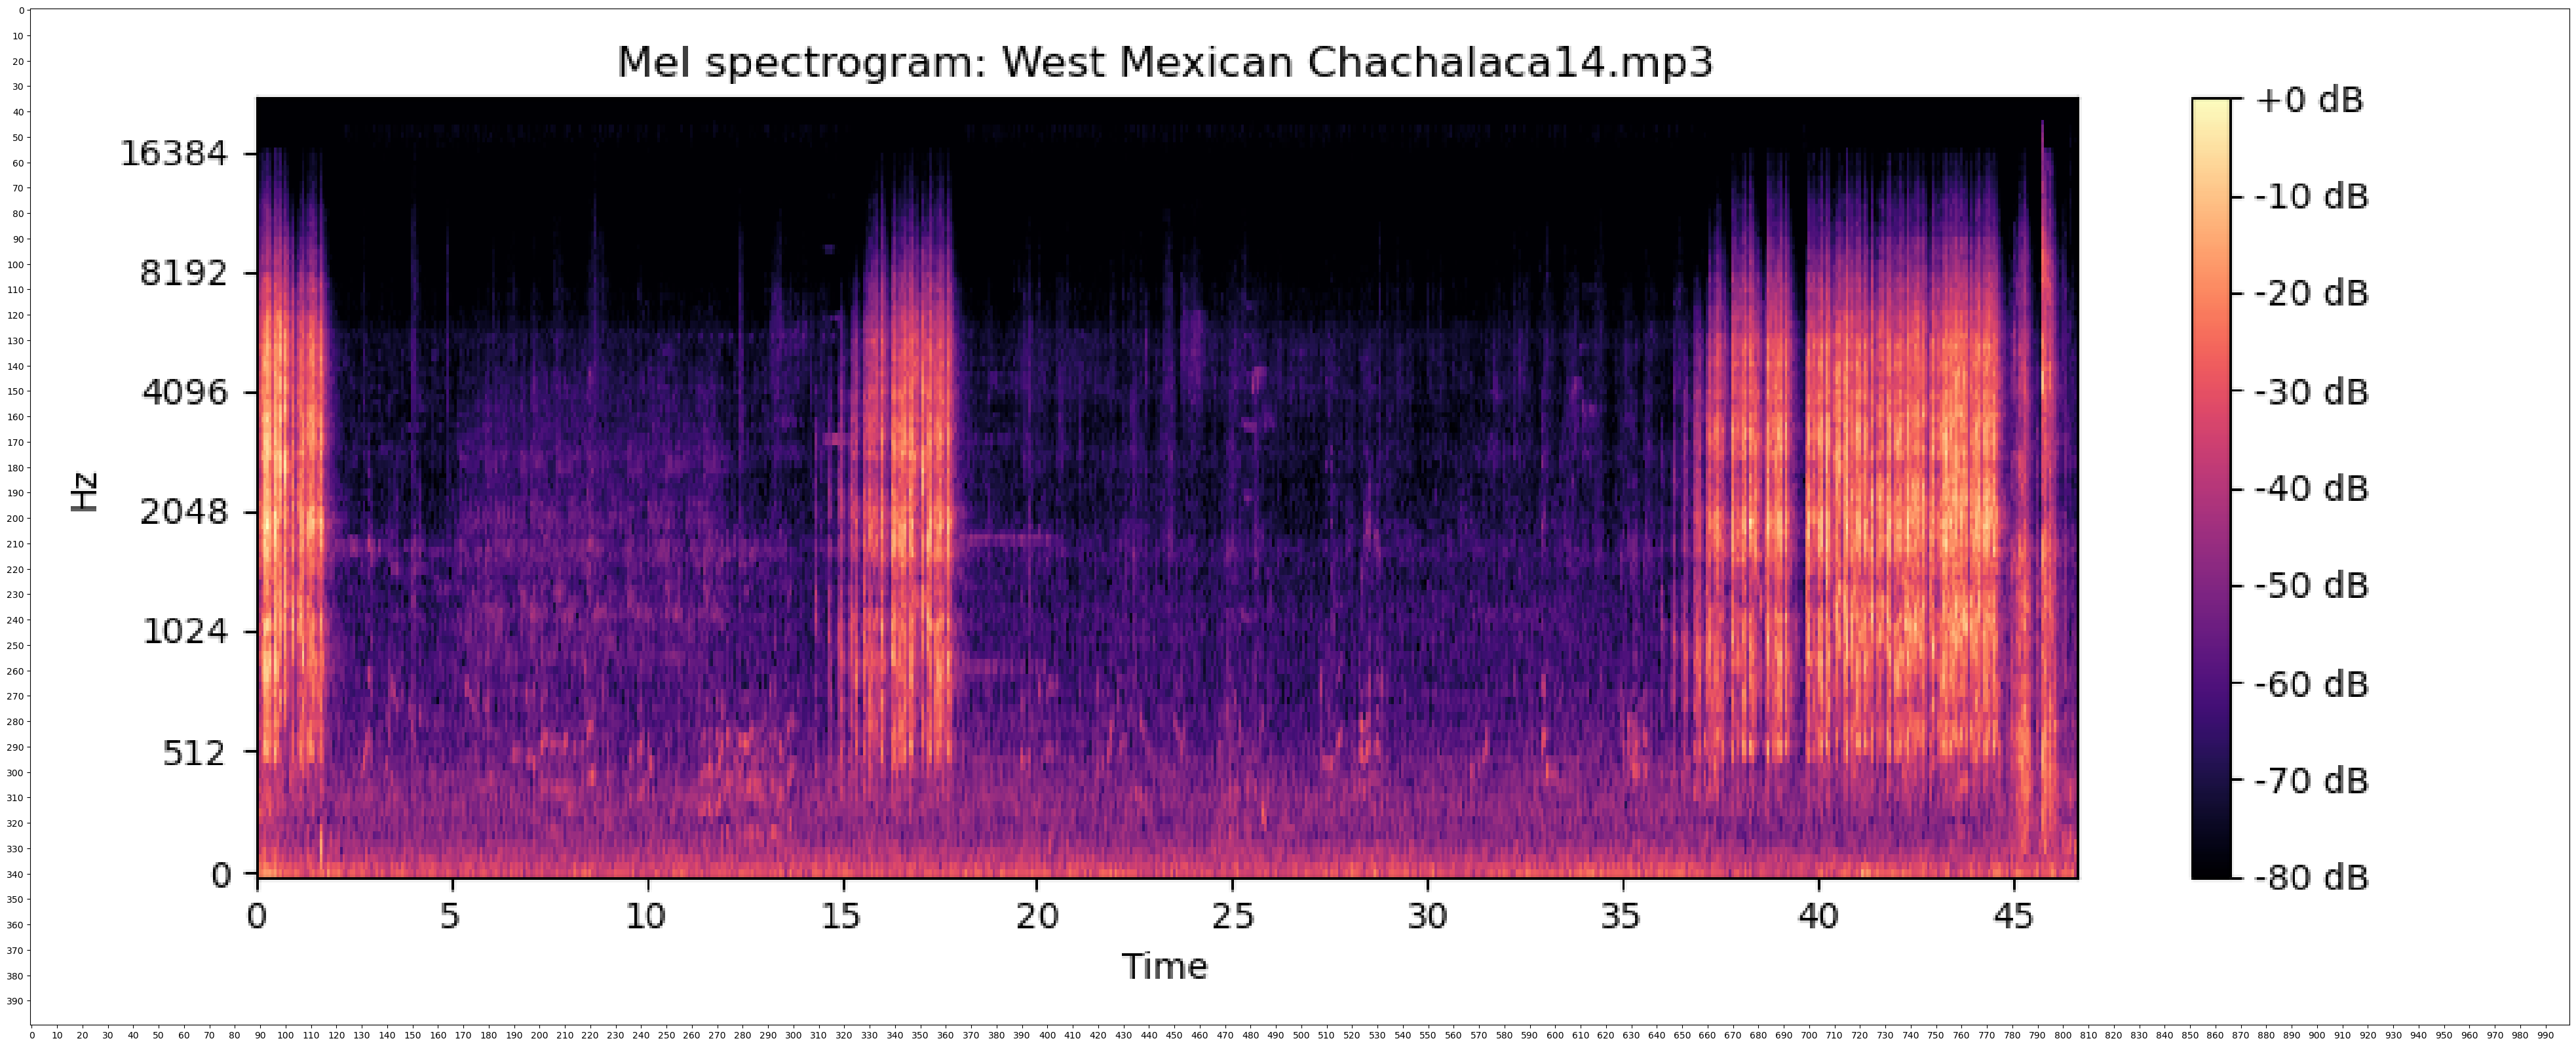

In [6]:
# Here i am displaying a spectrogram on a plot so I know where to crop it. I want to remove all the white area, including axis labels and graph label

# Create a new figure
fig, ax = plt.subplots(figsize=(50, 50))  # Create a new figure with a specific size (50x50 inches) -i chose this size so I can clearly see the tick interval because they were overlapping on smaller plots


# Display the image
ax.imshow(img)

# Set the x and y axis to show the pixel coordinates
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))  # This number adjusts the tick interval on the x axis
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))  # This number adjusts the tick interval on they axis

# Show the plot with the image
plt.show()


In [7]:
#Here i am removing the boader of the images. As I dont nee the axis lables and graph heading. This will save computing power and remove unecessary noice 
# box is defined as the left, upper, right, and lower pixel coordinates


#Create an empty dictionary to store the cropped images and their corresponding file names
cropped_images_dict = {}

# Loop over all subdirectories in the directory
for subdir in os.listdir(directory):
    subdir_path = os.path.join(directory, subdir)

    #Check if it's a directory
    if os.path.isdir(subdir_path):
        # Get a list of all PNG files in the subdirectory
        png_files = [file for file in os.listdir(subdir_path) if file.endswith('.png')]

        # Check if there are at least 10 PNG files - if there are less they are being dropped 
        if len(png_files) >= 10:
            # Loop over all PNG files in the subdirectory
            for file in png_files:
                img = Image.open(os.path.join(subdir_path, file))  # Open the image file
                
                #Define the box for cropping
                box = (90, 30, 810, 345)

                #Crop the image
                img = img.crop(box)

                #add the cropped image to the dictionary with the file name and subdirectory as the key
                cropped_images_dict[(subdir, file)] = img

# Now, cropped_images_dict contains the cropped images with their corresponding file names and subdirectories
#(GitHub Co-Pilot, 2024)

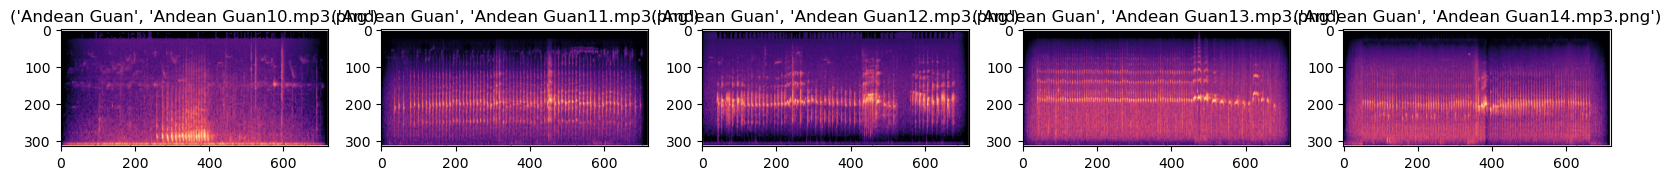

In [8]:
#this cell is for plotting the first 5 images to confirm the cropping was sucsessful
# here we will get the keys (subdirectory and file name pairs) from the dictionary
keys = list(cropped_images_dict.keys())

# Create a new figure for the first 5 images
fig, axs = plt.subplots(1, 5, figsize=(20, 20))

# Loop over the first 5 keys
for i, key in enumerate(keys[:5]):
    # Get the corresponding image
    img = cropped_images_dict[key]

    # Display the image
    axs[i].imshow(img)
    axs[i].set_title(key)

# Show the plot with the images
plt.show()

#the first 5 graphs are plotted below to confirm the cropping was sucsessful

In [9]:
# Get the list of names
names_list = list(cropped_images_dict.keys())

# Print the list
for name in names_list:
    print(name)

('Andean Guan', 'Andean Guan10.mp3.png')
('Andean Guan', 'Andean Guan11.mp3.png')
('Andean Guan', 'Andean Guan12.mp3.png')
('Andean Guan', 'Andean Guan13.mp3.png')
('Andean Guan', 'Andean Guan14.mp3.png')
('Andean Guan', 'Andean Guan15.mp3.png')
('Andean Guan', 'Andean Guan16.mp3.png')
('Andean Guan', 'Andean Guan17.mp3.png')
('Andean Guan', 'Andean Guan18.mp3.png')
('Andean Guan', 'Andean Guan19.mp3.png')
('Andean Tinamou', 'Andean Tinamou10.mp3.png')
('Andean Tinamou', 'Andean Tinamou11.mp3.png')
('Andean Tinamou', 'Andean Tinamou12.mp3.png')
('Andean Tinamou', 'Andean Tinamou13.mp3.png')
('Andean Tinamou', 'Andean Tinamou14.mp3.png')
('Andean Tinamou', 'Andean Tinamou15.mp3.png')
('Andean Tinamou', 'Andean Tinamou16.mp3.png')
('Andean Tinamou', 'Andean Tinamou17.mp3.png')
('Andean Tinamou', 'Andean Tinamou18.mp3.png')
('Andean Tinamou', 'Andean Tinamou19.mp3.png')
('Australian Brushturkey', 'Australian Brushturkey10.mp3.png')
('Australian Brushturkey', 'Australian Brushturkey11.mp3.

In [10]:
#converting the image data into numy arry so it can be used in the classificaiton models
# Create a list to store the numpy arrays
# Extract bird names from keys and sort
sorted_keys = sorted(cropped_images_dict.keys(), key=lambda x: x[0])

# Create a new dictionary with sorted keys
sorted_dict = {key: cropped_images_dict[key] for key in sorted_keys}

# Now i convert the sorted images to numpy arrays
numpy_arrays_list = []

# Loop over all keys in the sorted_dict dictionary
for key in sorted_dict.keys():
    # Get the corresponding image
    img = sorted_dict[key]

    # Convert the image to a numpy array
    numpy_array = np.array(img)

    # Add the numpy array to the list
    numpy_arrays_list.append(numpy_array)

# Convert the list of numpy arrays to a single numpy array
df = np.array(numpy_arrays_list)

# Print df
print(df)
print(df.shape)

#(GitHub Co-Pilot, 2024)

[[[[255 255 255 255]
   [255 255 255 255]
   [255 255 255 255]
   ...
   [255 255 255 255]
   [255 255 255 255]
   [255 255 255 255]]

  [[255 255 255 255]
   [255 255 255 255]
   [255 255 255 255]
   ...
   [255 255 255 255]
   [255 255 255 255]
   [255 255 255 255]]

  [[255 255 255 255]
   [255 255 255 255]
   [255 255 255 255]
   ...
   [255 255 255 255]
   [255 255 255 255]
   [255 255 255 255]]

  ...

  [[  0   0   0 255]
   [  0   0   0 255]
   [  0   0   0 255]
   ...
   [227 227 227 255]
   [255 255 255 255]
   [255 255 255 255]]

  [[226 226 226 255]
   [241 241 241 255]
   [241 241 241 255]
   ...
   [253 253 253 255]
   [255 255 255 255]
   [255 255 255 255]]

  [[241 241 241 255]
   [255 255 255 255]
   [255 255 255 255]
   ...
   [255 255 255 255]
   [255 255 255 255]
   [255 255 255 255]]]


 [[[255 255 255 255]
   [255 255 255 255]
   [255 255 255 255]
   ...
   [255 255 255 255]
   [255 255 255 255]
   [255 255 255 255]]

  [[255 255 255 255]
   [255 255 255 255]
   [

In [11]:
# Create an empty dictionary to store the number images for each bird. I did this to confirm that the input data remains sorted
counts = {}

# Loop over all names in the list
for name in names_list:
    # Get the bird name category
    bird_name_category = name[0]

    # If the bird name category is already in the dictionary, increment its count
    if bird_name_category in counts:
        counts[bird_name_category] += 1
    # Otherwise, add the bird name category to the dictionary with a count of 1
    else:
        counts[bird_name_category] = 1

# Print the counts
for bird_name_category, count in counts.items():
    print(f"{bird_name_category}: {count}")

#(GitHub Co-Pilot, 2024)

Andean Guan: 10
Andean Tinamou: 10
Australian Brushturkey: 10
Band-tailed Guan: 10
Bartletts Tinamou: 10
Baudo Guan: 10
Bearded Guan: 10
Berlepschs Tinamou: 10
Black Tinamou: 10
Black-billed Brushturkey: 10
Black-capped Tinamou: 10
Black-fronted Piping Guan: 10
Blue-throated Piping Guan: 10
Brazilian Tinamou: 10
Brown Tinamou: 10
Brushland Tinamou: 10
Buff-browed Chachalaca: 10
Cauca Guan: 10
Chaco Chachalaca: 10
Chestnut-bellied Guan: 10
Chestnut-winged Chachalaca: 10
Chilean Tinamou: 10
Cinereous Tinamou: 10
Collared Brushturkey: 10
Colombian Chachalaca: 10
Crested Guan: 10
Darwins Nothura: 10
Dusky Megapode: 10
Dusky-legged Guan: 10
Dwarf Tinamou: 10
East Brazilian Chachalaca: 10
Elegant Crested Tinamou: 10
Emu: 10
Greater Rhea: 10
Grey Tinamou: 10
Grey-headed Chachalaca: 10
Grey-legged Tinamou: 10
Highland Tinamou: 10
Hooded Tinamou: 10
Huayco Tinamou: 10
Lesser Nothura: 10
Little Chachalaca: 10
Little Tinamou: 10
Marail Guan: 10
Melanesian Megapode: 10
North Island Brown Kiwi: 10


In [12]:
#storing the lables as a np array so i can use it in navies bayers and KNN
# Create a list to store the labels
labels_list = []

# Loop over all keys in the sorted_dict dictionary
for key in sorted_dict.keys():
    # Get the bird name category
    bird_name_category = key[0]

    # Add the bird name category to the list
    labels_list.append(bird_name_category)

# Convert the list of labels to a numpy array
labels = np.array(labels_list)
print (labels)

['Andean Guan' 'Andean Guan' 'Andean Guan' 'Andean Guan' 'Andean Guan'
 'Andean Guan' 'Andean Guan' 'Andean Guan' 'Andean Guan' 'Andean Guan'
 'Andean Tinamou' 'Andean Tinamou' 'Andean Tinamou' 'Andean Tinamou'
 'Andean Tinamou' 'Andean Tinamou' 'Andean Tinamou' 'Andean Tinamou'
 'Andean Tinamou' 'Andean Tinamou' 'Australian Brushturkey'
 'Australian Brushturkey' 'Australian Brushturkey'
 'Australian Brushturkey' 'Australian Brushturkey'
 'Australian Brushturkey' 'Australian Brushturkey'
 'Australian Brushturkey' 'Australian Brushturkey'
 'Australian Brushturkey' 'Band-tailed Guan' 'Band-tailed Guan'
 'Band-tailed Guan' 'Band-tailed Guan' 'Band-tailed Guan'
 'Band-tailed Guan' 'Band-tailed Guan' 'Band-tailed Guan'
 'Band-tailed Guan' 'Band-tailed Guan' 'Bartletts Tinamou'
 'Bartletts Tinamou' 'Bartletts Tinamou' 'Bartletts Tinamou'
 'Bartletts Tinamou' 'Bartletts Tinamou' 'Bartletts Tinamou'
 'Bartletts Tinamou' 'Bartletts Tinamou' 'Bartletts Tinamou' 'Baudo Guan'
 'Baudo Guan' 'Baudo 

In [13]:
#navies bayers no k fold cross validation
# Reshape df to 2D as required by the classifier
df_2d = df.reshape(df.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_2d, labels, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Test the classifier
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f"Accuracy: {accuracy:.2f}")
#(Banerjee, 2020) (GitHub Co-Pilot, 2024)

Accuracy: 0.51


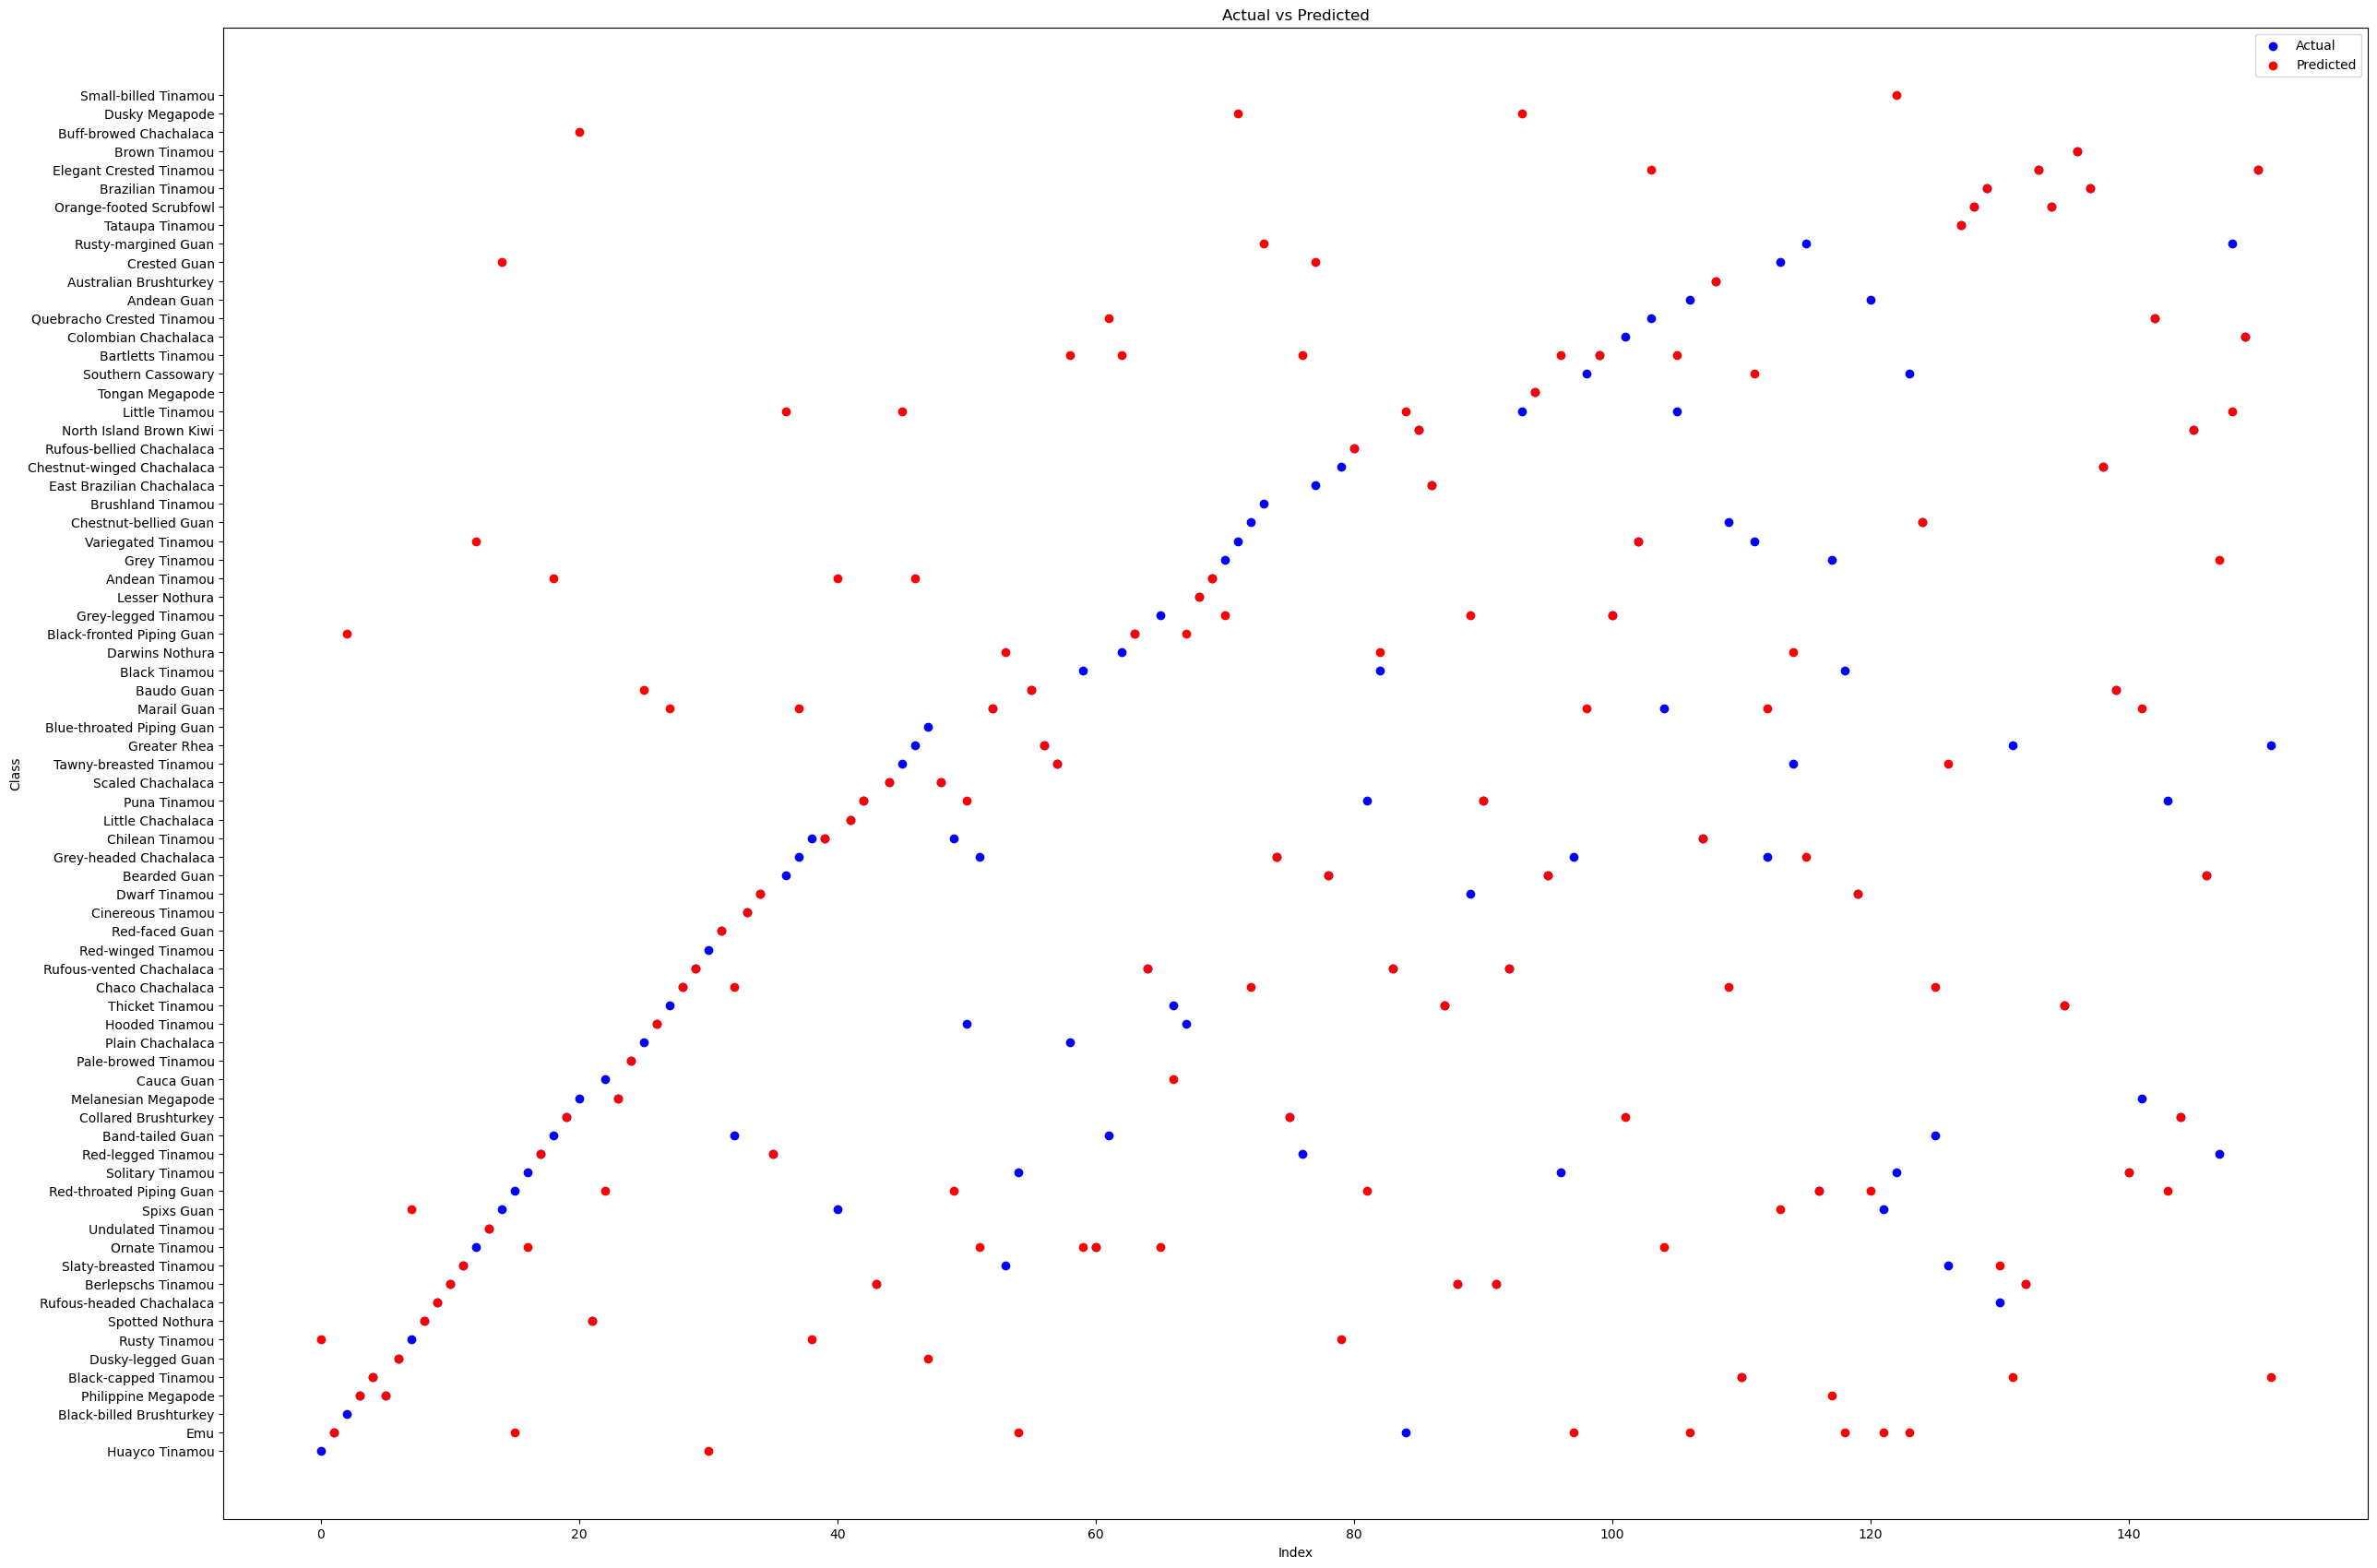

In [14]:
# Plot results of Naive Bayes
plt.figure(figsize=(30, 21))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()

In [15]:
#as can be seen from the test above, the Navies Bayers classifer achived an accuracy rating of 0,51. This means only classified half do the birds correctly.
#This low score was expected as the Navies Bayers classifer is not the best for image classification.
#I attemptd to integrate K-Folds, howver

In [16]:
#i am going to try this again however I will now use K-Folds in an attempt to increase the accuracy score
# Create a Gaussian Naive Bayes classifier
# Perform k-fold cross-validation for each value of k
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# List to store the cross-validation scores
cv_scores = []

# Range of values for k
k_values = range(2, 6)  # The reason i decided to do small ranges is because when I was trying larger ranges it was taking hours to run



In [17]:
# Perform k-fold cross-validation for each value of k
for k in k_values:
    # Create a KFold object
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)

    # Perform k-fold cross-validation
    scores = cross_val_score(gnb, df_2d, labels, cv=kfold)

    # Append the mean score to the cv_scores list
    cv_scores.append(scores.mean())
#(Banerjee, 2020) (GitHub Co-Pilot, 2024)

k=2, Accuracy: 0.41
k=3, Accuracy: 0.48
k=4, Accuracy: 0.49
k=5, Accuracy: 0.51


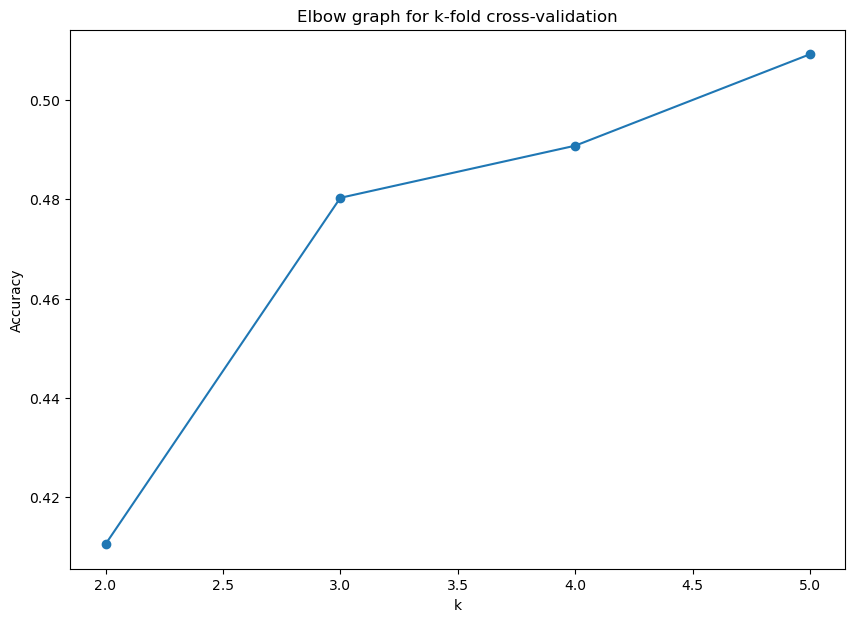

In [18]:
# Print all results
for k, score in zip(k_values, cv_scores):
    print(f"k={k}, Accuracy: {score:.2f}")

# Plot the elbow graph

plt.figure(figsize=(10, 7))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Elbow graph for k-fold cross-validation')
plt.show()
#(Banerjee, 2020) (GitHub Co-Pilot, 2024)

In [19]:
#as can be seen in the elbow graph, the accuracy is rising. so I will try again with more folds to see if the accuracy continues to increase 
#The first major elbow is at 3 folds, but as the accuracy is still increasing I will keep trying to raise the number of folds until returns are diminishing
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

#  a list to store the cross-validation scores
cv_scores = []

# range of values for k
k_values = range(5, 8) #testeing for the best value of k from 2 - 15

In [20]:
# Perform k-fold cross-validation for each value of k
for k in k_values:
    # Create a KFold object
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)

    # Perform k-fold cross-validation
    scores = cross_val_score(gnb, df_2d, labels, cv=kfold)

    # Append the mean score to the cv_scores list
    cv_scores.append(scores.mean())

k=5, Accuracy: 0.51
k=6, Accuracy: 0.52
k=7, Accuracy: 0.52


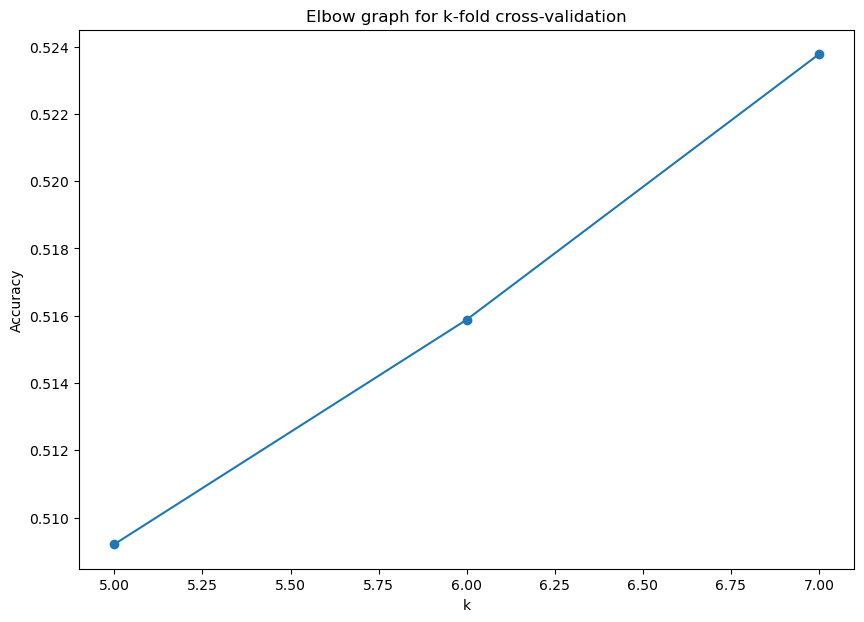

In [21]:
# Print all results
for k, score in zip(k_values, cv_scores):
    print(f"k={k}, Accuracy: {score:.2f}")

# Plot elbow graph
plt.figure(figsize=(10, 7))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Elbow graph for k-fold cross-validation')
plt.show()

In [22]:
#as can be seen in the elbow graph, the accuracy is still rising, even though the the margins are getting smaller 
#The returns are already diminishing but for interest sake I will continue to increase the number of folds to see if the accuracy continues to increase
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

#  a list to store the cross-validation scores
cv_scores = []

# range of values for k
k_values = range(8, 12) #testeing for the best value of k from 2 - 15

In [23]:
# Perform k-fold cross-validation for each value of k
for k in k_values:
    # Create a KFold object
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)

    # Perform k-fold cross-validation
    scores = cross_val_score(gnb, df_2d, labels, cv=kfold)

    # Append the mean score to the cv_scores list
    cv_scores.append(scores.mean())

k=8, Accuracy: 0.53
k=9, Accuracy: 0.54
k=10, Accuracy: 0.54
k=11, Accuracy: 0.54


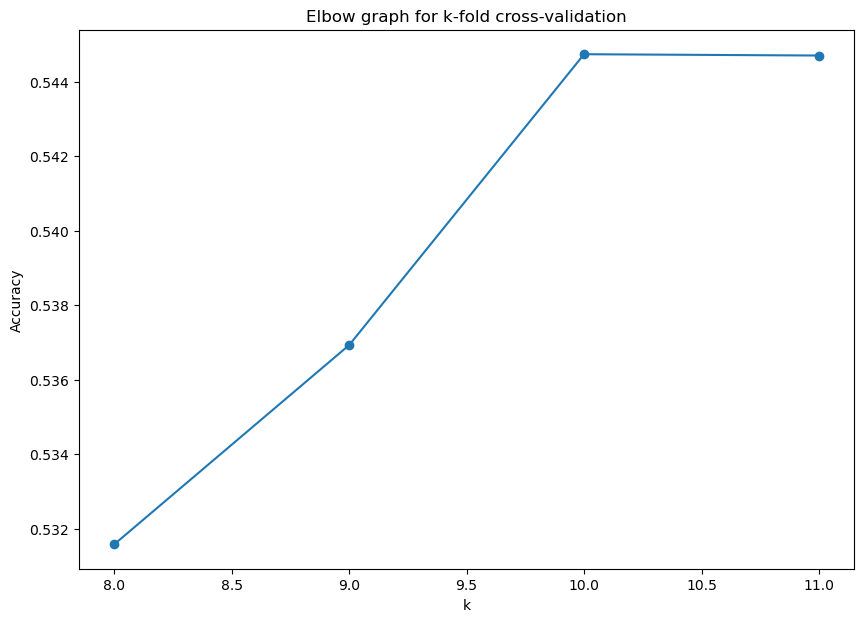

In [24]:
# Print all results
for k, score in zip(k_values, cv_scores):
    print(f"k={k}, Accuracy: {score:.2f}")

# Plot elbow graph
plt.figure(figsize=(10, 7))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Elbow graph for k-fold cross-validation')
plt.show()

In [25]:
#based on the elbow graphs generated, the largest bend is at 3 folds and 10 folds. At 10 folds, the graph goes completely flat. This means that the accuracy is not increasing anymore
#based on this information, I have decided 10 K-Folds is the best value for K. After 10, the data seems to start overfitting. Therefore for the final iteration of the Navies Bayers classifer I will use 10 K-Folds

10-fold cross-validation accuracy: 0.54


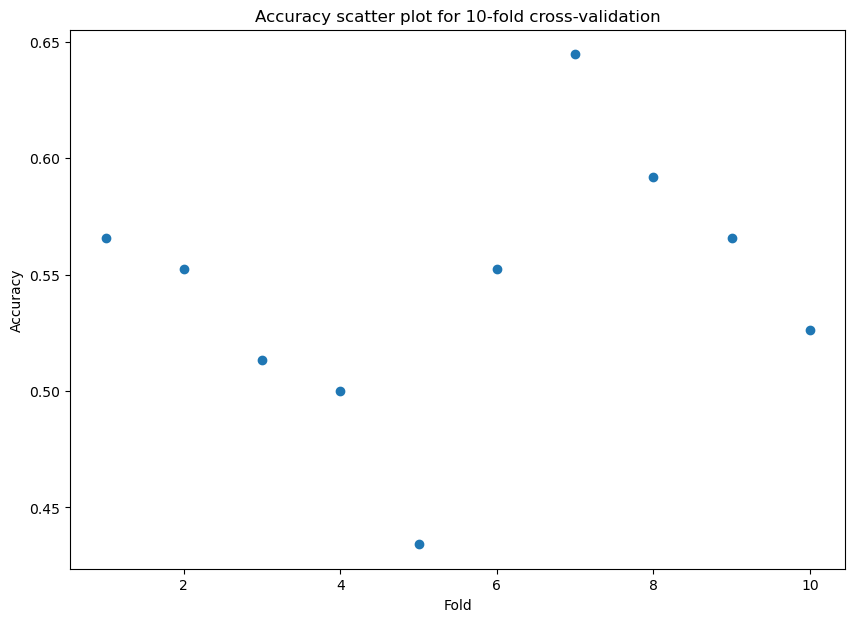

In [64]:
#Final Naive Beyers Model
gnb = GaussianNB()

#  a list to store the cross-validation scores
cv_scores = []

# Perform k-fold cross-validation for each value of k
for k in k_values:
    # Create a KFold object
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)

    # Perform k-fold cross-validation
    scores = cross_val_score(gnb, df_2d, labels, cv=kfold)

    # Append the mean score to the cv_scores list
    cv_scores.append(scores.mean())

# Print all results
# Print the result
print(f"10-fold cross-validation accuracy: {scores.mean():.2f}")

# Plot accuracy scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(range(1, 11), scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy scatter plot for 10-fold cross-validation')
plt.show()
#(GitHub Co-Pilot, 2024)


In [27]:

#this is the most accurate I was able to get the navies bayers classifer. The accuracy is 0.54. This is not a great score but, this model is not knowen for image classification
# this poor score is evident by the scatterplot generated above. If this model was highly accurate, the scatterplot would be a straight diagonal line.
#I will now be using the K-NN classifer to see if I can get a better score 

In [41]:
#KNN
#for the first iteration I am using a standard 20/80 split. This si so i can find the best value for the number of neighbours
# Use entire the 2d df as features and 'labels' as target
X = df_2d
y = labels  

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_accuracy = 0
best_k = 0

# Try a range of values for n_neighbors
for k in range(1, 100): #Starting high so I can determine the definite best value for k
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of KNN model with k={k}: {accuracy}")

    # If this model's accuracy is better than the previous best, update best_accuracy and best_k
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best accuracy is {best_accuracy} with k={best_k}")
#(Abdekghfar, 2024) (Segun, 2019) (GitHub Co-Pilot, 2024)

Accuracy of KNN model with k=1: 0.5526315789473685
Accuracy of KNN model with k=2: 0.4144736842105263
Accuracy of KNN model with k=3: 0.3618421052631579
Accuracy of KNN model with k=4: 0.27631578947368424
Accuracy of KNN model with k=5: 0.24342105263157895
Accuracy of KNN model with k=6: 0.19736842105263158
Accuracy of KNN model with k=7: 0.17105263157894737
Accuracy of KNN model with k=8: 0.15789473684210525
Accuracy of KNN model with k=9: 0.1513157894736842
Accuracy of KNN model with k=10: 0.13815789473684212
Accuracy of KNN model with k=11: 0.13815789473684212
Accuracy of KNN model with k=12: 0.11842105263157894
Accuracy of KNN model with k=13: 0.11842105263157894
Accuracy of KNN model with k=14: 0.10526315789473684
Accuracy of KNN model with k=15: 0.09868421052631579
Accuracy of KNN model with k=16: 0.09868421052631579
Accuracy of KNN model with k=17: 0.07236842105263158
Accuracy of KNN model with k=18: 0.08552631578947369
Accuracy of KNN model with k=19: 0.09868421052631579
Accura

Mean accuracy of KNN model with k-fold cross-validation (k=2): 0.22236842105263158
Mean accuracy of KNN model with k-fold cross-validation (k=3): 0.3447345761621694
Mean accuracy of KNN model with k-fold cross-validation (k=4): 0.4039473684210526
Mean accuracy of KNN model with k-fold cross-validation (k=5): 0.47631578947368425
Mean accuracy of KNN model with k-fold cross-validation (k=6): 0.5104674415698037
Mean accuracy of KNN model with k-fold cross-validation (k=7): 0.5617324401728071
Mean accuracy of KNN model with k-fold cross-validation (k=8): 0.5960526315789474
Mean accuracy of KNN model with k-fold cross-validation (k=9): 0.5906473700591347
Mean accuracy of KNN model with k-fold cross-validation (k=10): 0.6315789473684211


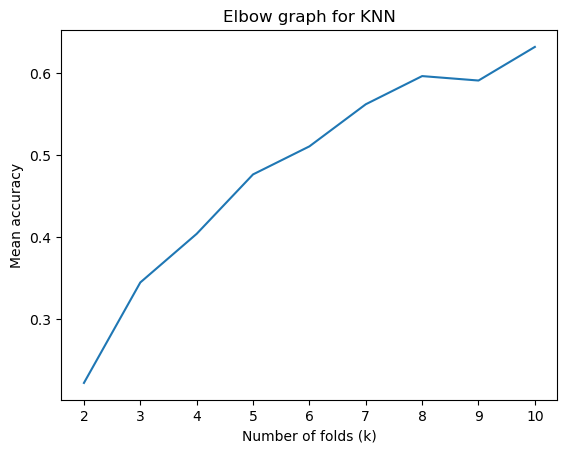

In [42]:
#Now that I know the most accurate number of neighbours, 1, I will attempt to increase the accuracy by introducing K folds
X = df_2d
y = labels  

# Create a KNN classifier with best k
knn = KNeighborsClassifier(n_neighbors=1)

mean_accuracies = []

# Try a range of values for k in k-fold cross-validation
for k in range(2, 11):  # This range was chosen because it is a I can not have more than 10 folds as there are only 10 images per bird. 
    # Perform k-fold cross-validation and calculate the mean accuracy
    scores = cross_val_score(knn, X, y, cv=k) #cv represents number of folds, here I am using a range again to test if having more neighbours affects the acccuracy with folds
    mean_accuracy = scores.mean()
    mean_accuracies.append(mean_accuracy)

    print(f"Mean accuracy of KNN model with k-fold cross-validation (k={k}): {mean_accuracy}")

# Plot the elbow graph
plt.plot(range(2, 11), mean_accuracies)
plt.xlabel('Number of folds (k)')
plt.ylabel('Mean accuracy')
plt.title('Elbow graph for KNN')
plt.show()
#(Abdekghfar, 2024) (Segun, 2019) (GitHub Co-Pilot, 2024)

Mean accuracy of KNN model with k-fold cross-validation (k=2): 0.05394736842105263
Mean accuracy of KNN model with k-fold cross-validation (k=3): 0.12107206954861867
Mean accuracy of KNN model with k-fold cross-validation (k=4): 0.14473684210526316
Mean accuracy of KNN model with k-fold cross-validation (k=5): 0.17894736842105263
Mean accuracy of KNN model with k-fold cross-validation (k=6): 0.19209057201183186
Mean accuracy of KNN model with k-fold cross-validation (k=7): 0.2249284015339061
Mean accuracy of KNN model with k-fold cross-validation (k=8): 0.23684210526315788
Mean accuracy of KNN model with k-fold cross-validation (k=9): 0.2394646747587924
Mean accuracy of KNN model with k-fold cross-validation (k=10): 0.2552631578947368


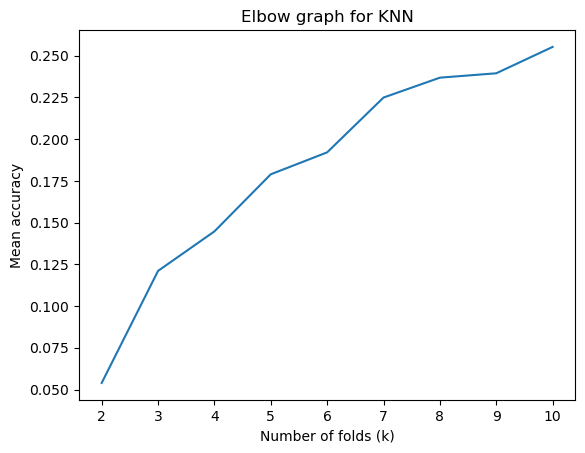

In [31]:
#I can see from thegraph above that the best number of folds is 10 folds. However I will still test to see if raising the number of neighbours in addition to the folds increases the accuracy
#Attempting to raise the number of neighbours to see if the accuracy increases
X = df_2d
y = labels  

# Create a KNN classifier with best k
knn = KNeighborsClassifier(n_neighbors=10)

mean_accuracies = []

# Try a range of values for k in k-fold cross-validation
for k in range(2, 11):  # This range was chosen because it is a I can not have more than 10 folds as there are only 10 images per bird. 
    # Perform k-fold cross-validation and calculate the mean accuracy
    scores = cross_val_score(knn, X, y, cv=k) #cv represents number of folds, here I am using a range again to test if having more neighbours affects the acccuracy with folds
    mean_accuracy = scores.mean()
    mean_accuracies.append(mean_accuracy)

    print(f"Mean accuracy of KNN model with k-fold cross-validation (k={k}): {mean_accuracy}")

# Plot the elbow graph
plt.plot(range(2, 11), mean_accuracies)
plt.xlabel('Number of folds (k)')
plt.ylabel('Mean accuracy')
plt.title('Elbow graph for KNN')
plt.show()
#(Abdekghfar, 2024) (Segun, 2019) (GitHub Co-Pilot, 2024)

Mean accuracy of KNN model with 10-fold cross-validation: 0.6118421052631579


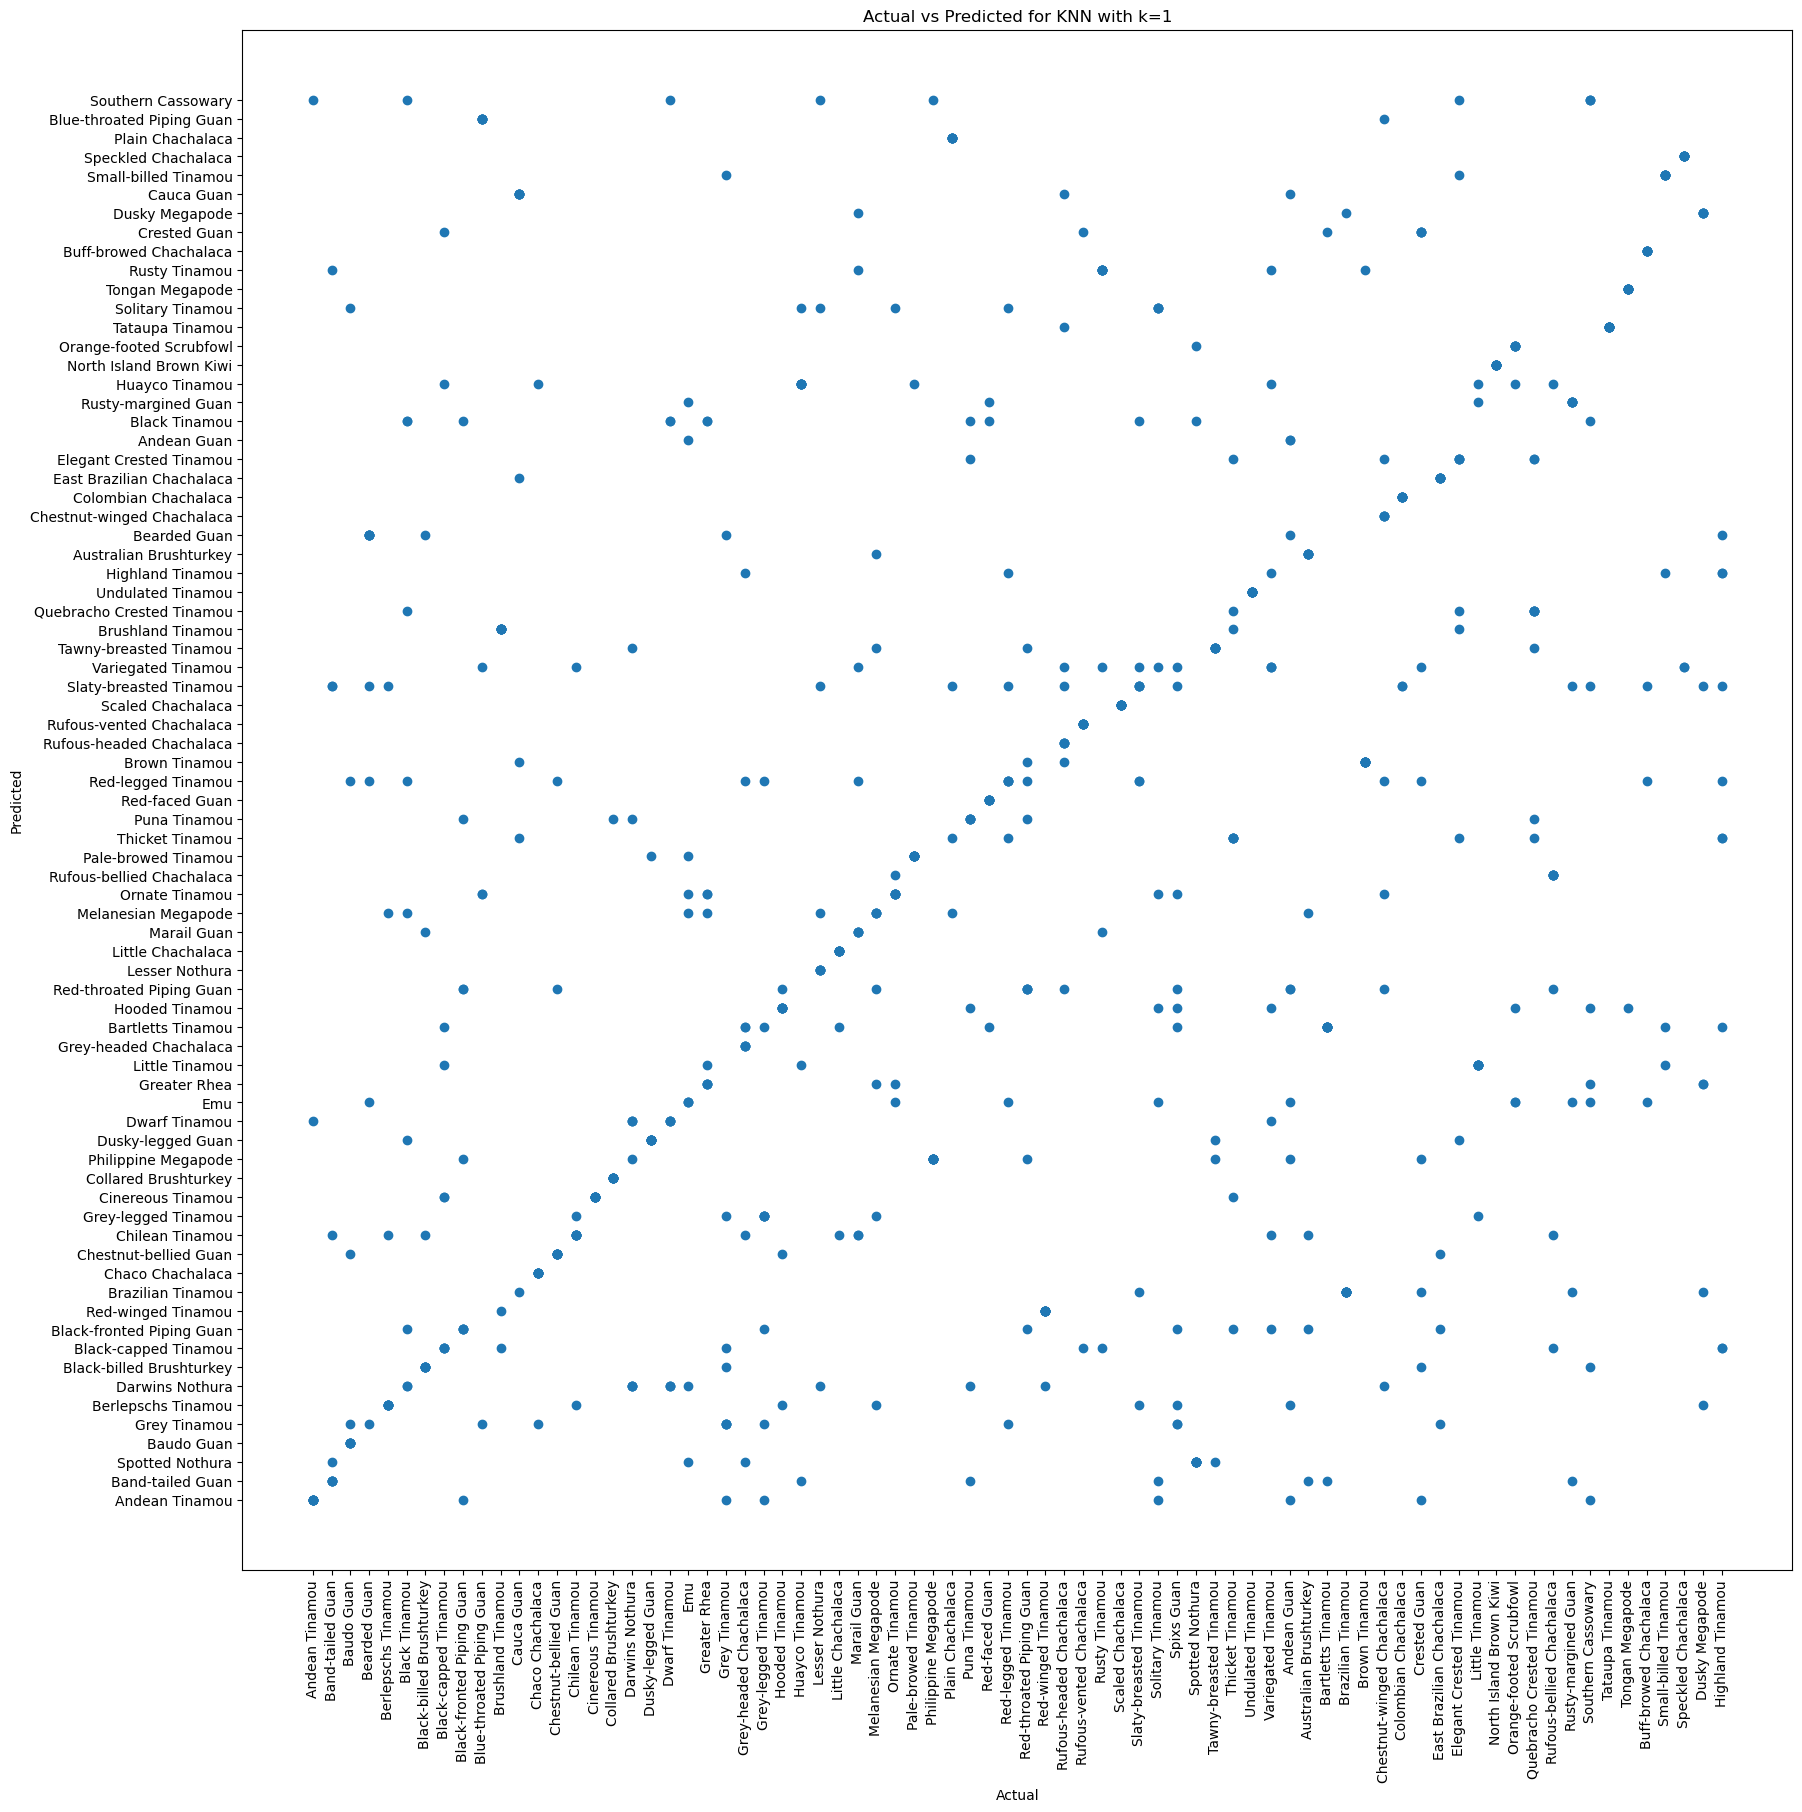

In [50]:
#final KNN model
#The accuray went down when increasing the number of neighbours. So for the final model I have decided to stik wil 1 neighbour and 10 folds
X = df_2d
y = labels  
# Create a KNN classifier with best k, 1.
knn = KNeighborsClassifier(n_neighbors=1)

# Perform 10-fold cross-validation - as has been calculated t be the most accurate
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

y_true = []
y_pred_all = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    knn.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn.predict(X_test)

    # Append the true and predicted labels
    y_true.extend(y_test)
    y_pred_all.extend(y_pred)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print the mean accuracy
mean_accuracy = np.mean(accuracies)
print(f"Mean accuracy of KNN model with 10-fold cross-validation: {mean_accuracy}")

# Plot actual vs prediction
plt.figure(figsize=(20, 20))
plt.scatter(y_true, y_pred_all)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for KNN with k=1')
plt.xticks(rotation='vertical')  # Rotate x labels to be vertical
plt.show()
#(Abdekghfar, 2024) (Segun, 2019) (GitHub Co-Pilot, 2024)


In [44]:
#The accuracy continues to increase as the number of folds increases. This is a good sign as it means the model is not overfitting. It cant go any higer as there are only 10 images per bird. 
#Therefore for the final model I will be using 10 folds and 1 neighbour as that gave the most accurate results 0.6315789473684211
#For intrest sake I did play with the number of neighbours in the K-fold , however the highest accuracy remained at 1 neighbour

In [45]:
#Now I will run the images through a CNN model to see if I can get a better accuracy score

In [52]:
# Getting the size of the images so i can insert them into a CNN model
img = sorted_dict[key]

# Print the size of the image
print(img.size)

(720, 315)


In [53]:

# Convert the dictionary of images to a list of numpy arrays and a list of labels
X = []
y = []
for key, img in sorted_dict.items():
    # Convert the image to a numpy array and normalize it
    numpy_array = np.array(img.convert('RGB'), dtype=np.uint8) / 255.0
    X.append(numpy_array)
    
    # Use the subdirectory name as the label
    y.append(key[0])

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#(GitHub Co-Pilot, 2024)
#(Raiaan et al., 2024)

In [54]:
# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
#(Open AI, 2024)
#(Raiaan et al., 2024)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 832ms/step - accuracy: 0.0123 - loss: 25.6930 - val_accuracy: 0.0066 - val_loss: 4.3323
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 823ms/step - accuracy: 0.0072 - loss: 4.3277 - val_accuracy: 0.0066 - val_loss: 4.3389
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 827ms/step - accuracy: 0.0257 - loss: 4.3070 - val_accuracy: 0.0197 - val_loss: 4.3382
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 807ms/step - accuracy: 0.0288 - loss: 4.1916 - val_accuracy: 0.0461 - val_loss: 4.2882
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 790ms/step - accuracy: 0.0647 - loss: 4.0533 - val_accuracy: 0.0461 - val_loss: 4.2708
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 759ms/step - accuracy: 0.1472 - loss: 3.7757 - val_accuracy: 0.0592 - val_loss: 4.3193
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 767ms/step - accuracy: 0.1696 - loss: 3.5342 - val_accuracy: 0.0921 - val_loss: 4.1919
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 762ms/step - accuracy: 0.2315 - loss: 3.1417 - val_acc

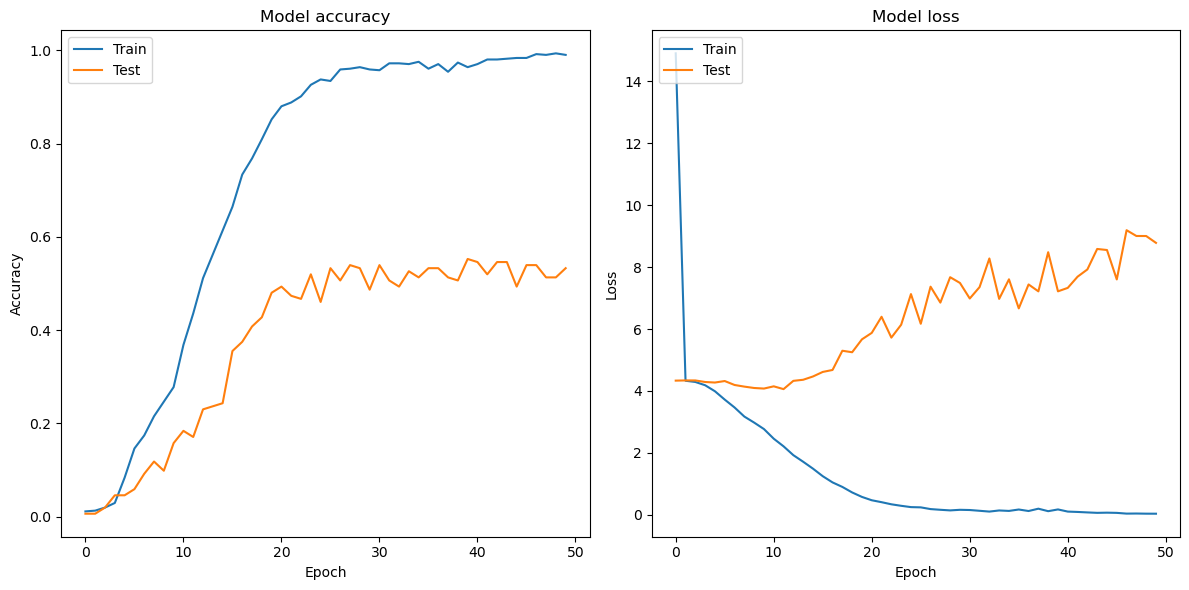

In [55]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [56]:
#Based on the information generated, the best number of epocs which result n the highest accuraty and validation accuray is
#The validation accuray being so low is a sgn of overfitting. I will now attempt to fix this by adding a dropout layer

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 946ms/step - accuracy: 0.0078 - loss: 16.1179 - val_accuracy: 0.0066 - val_loss: 4.3316
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 916ms/step - accuracy: 0.0160 - loss: 4.3306 - val_accuracy: 0.0066 - val_loss: 4.3328
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 936ms/step - accuracy: 0.0157 - loss: 4.3307 - val_accuracy: 0.0066 - val_loss: 4.3340
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 932ms/step - accuracy: 0.0087 - loss: 4.3302 - val_accuracy: 0.0000e+00 - val_loss: 4.3351
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 944ms/step - accuracy: 0.0070 - loss: 4.3300 - val_accuracy: 0.0000e+00 - val_loss: 4.3364
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 926ms/step - accuracy: 0.0095 - loss: 4.3297 - val_accuracy: 0.0000e+00 - val_loss: 4.3377
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 956ms/step - accuracy: 0.0150 - loss: 4.3287 - val_accuracy: 0.0000e+00 - val_loss: 4.3389
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 922ms/step - accuracy: 0.0206 - loss: 

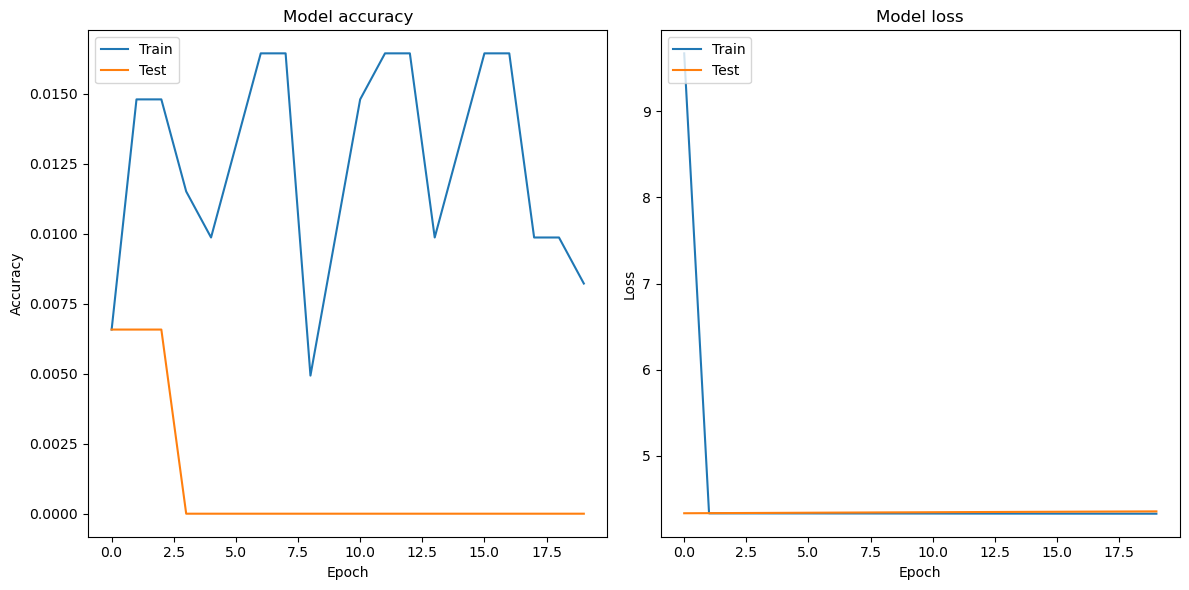

In [57]:
#This iteration makes use of drop out layers in an attampt to combat overfitting. I am also using 20 epochs, as based on the previous model, after this oint the data begins to overfit 
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Adding dropout after the first max-pooling layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Adding dropout after the second max-pooling layer
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),   # Adding dropout before the final output layer
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
#(Open AI, 2024)
#(Raiaan et al., 2024)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.0189 - loss: 21.2912 - val_accuracy: 0.0066 - val_loss: 4.5216
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.0214 - loss: 4.2884 - val_accuracy: 0.0197 - val_loss: 4.3111
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.0978 - loss: 4.0353 - val_accuracy: 0.0921 - val_loss: 4.2010
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.2255 - loss: 3.5325 - val_accuracy: 0.1842 - val_loss: 3.9912
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.4040 - loss: 2.7819 - val_accuracy: 0.2829 - val_loss: 3.7343
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5726 - loss: 2.0532 - val_accuracy: 0.3092 - val_loss: 3.4848
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7082 - loss: 1.3454 - val_accuracy: 0.3816 - val_loss: 3.2046
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8296 - loss: 0.7712 - val_accuracy: 0.5000 - val_loss

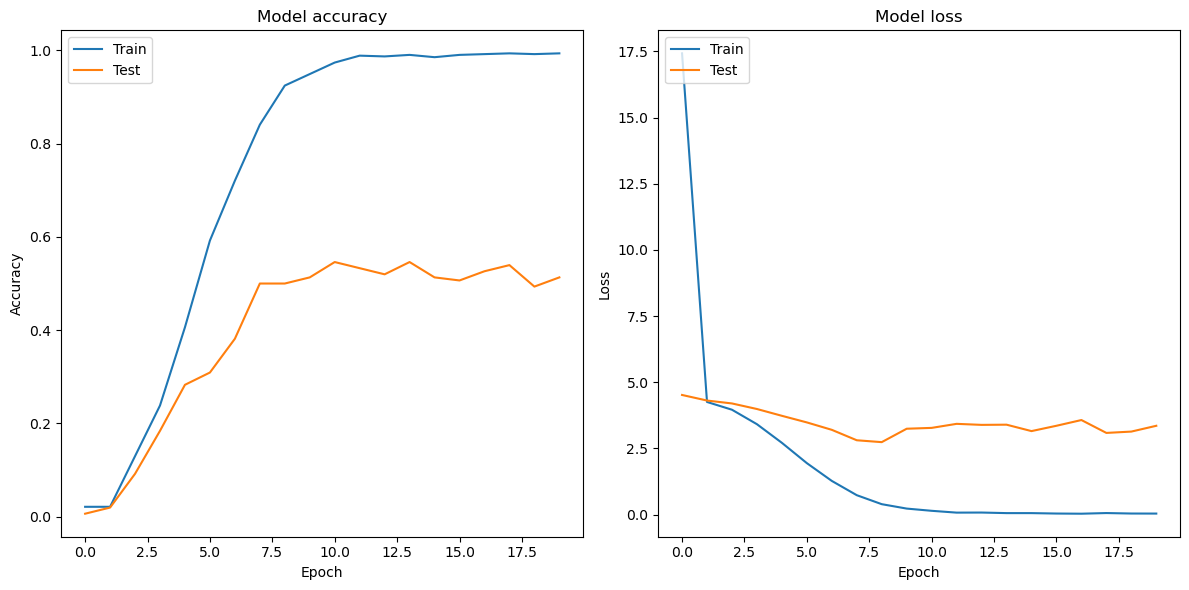

In [59]:
#it appears adding a drop out layer has decreased the validation accuracy to 0. I will revert back to the previous model and attempt to tune the hyper parameters to imporve the models accuracy 
# In this iteration I am increasing the batch size to 64 and keeping the number of epochs at 20
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test)) # Increaseing the batch size from default 32 to 64

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
#(Open AI, 2024)
#(Raiaan et al., 2024)
  

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.0197 - loss: 15.0046 - val_accuracy: 0.0395 - val_loss: 5.0409
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.0484 - loss: 4.9480 - val_accuracy: 0.0197 - val_loss: 4.9201
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.1204 - loss: 4.6591 - val_accuracy: 0.0461 - val_loss: 4.8417
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.2846 - loss: 3.9889 - val_accuracy: 0.1250 - val_loss: 4.7480
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5427 - loss: 2.9529 - val_accuracy: 0.2566 - val_loss: 4.2537
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6554 - loss: 2.0707 - val_accuracy: 0.4605 - val_loss: 3.6813
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8557 - loss: 1.2360 - val_accuracy: 0.5000 - val_loss: 3.3636
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9306 - loss: 0.9095 - val_accuracy: 0.5197 - val_loss

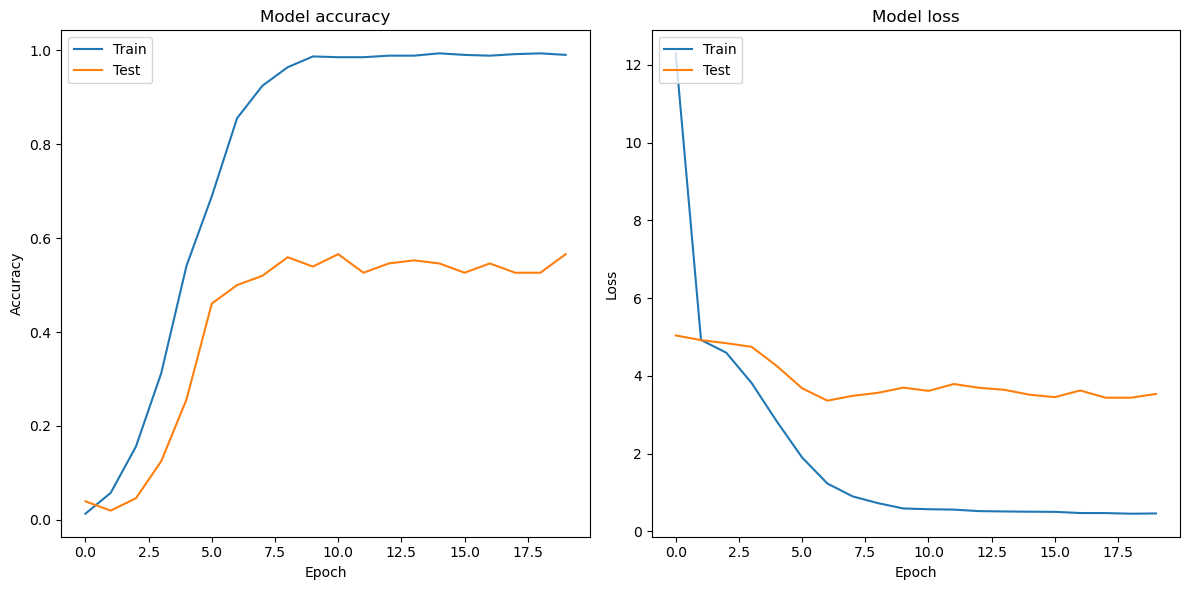

In [62]:
#It appears that increaseing the batch size has increased the accuracy. So I will keep this change in the net iteration of the model
# In this iteration I will add regulerization in an attempt to combat overfitting. I have decided to use L2 regulerization as it is good at combatting oevrfitting
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:], kernel_regularizer=l2(0.01)), #adding l2 regulerization
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax', kernel_regularizer=l2(0.01)) #adding l2 regulerization
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test)) # Increaseing the batch size from default 32 to 64

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
  #(Open AI, 2024)
  #(Raiaan et al., 2024)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.0196 - loss: 16.9715 - val_accuracy: 0.0132 - val_loss: 5.0393
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.0147 - loss: 5.0015 - val_accuracy: 0.0263 - val_loss: 4.9544
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.0379 - loss: 4.9143 - val_accuracy: 0.0592 - val_loss: 4.7669
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.1075 - loss: 4.5679 - val_accuracy: 0.1842 - val_loss: 4.4489
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.2682 - loss: 3.9095 - val_accuracy: 0.3421 - val_loss: 3.8161
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5606 - loss: 2.7815 - val_accuracy: 0.4539 - val_loss: 3.3360
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7181 - loss: 1.9191 - val_accuracy: 0.5526 - val_loss: 3.0971
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8676 - loss: 1.2495 - val_accuracy: 0.5855 - val_loss

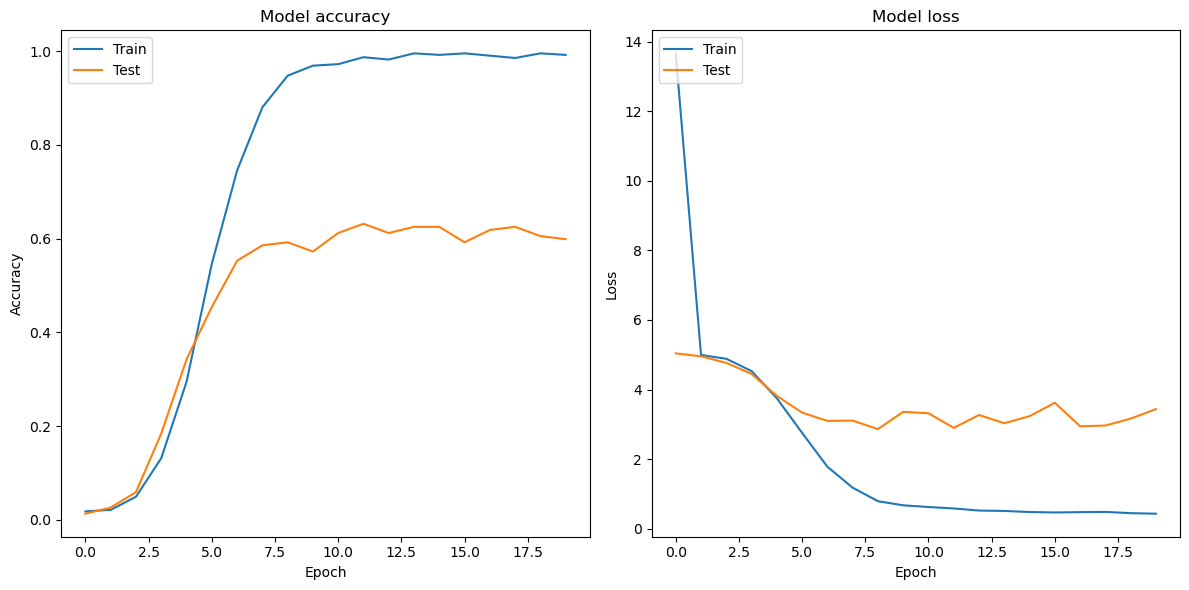

In [65]:
#It appears that increaseing the batch size has increased the accuracy. So I will keep this change in the net iteration of the model
# In this iteration I will use stratify to get a more training and test dataset
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #Stratify is used to get a more balanced training and test dataset

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:], kernel_regularizer=l2(0.01)), #adding l2 regulerization
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax', kernel_regularizer=l2(0.01)) #adding l2 regulerization
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test)) # Increaseing the batch size from default 32 to 64

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
  #(Open AI, 2024)
  #(Raiaan et al., 2024)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.0704 - loss: 5.1535 - val_accuracy: 0.0263 - val_loss: 5.0106
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.1868 - loss: 4.5149 - val_accuracy: 0.0197 - val_loss: 5.0944
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.2992 - loss: 4.0139 - val_accuracy: 0.0132 - val_loss: 5.2747
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.4891 - loss: 3.4327 - val_accuracy: 0.0000e+00 - val_loss: 5.6348
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.7273 - loss: 2.8067 - val_accuracy: 0.0066 - val_loss: 6.2623
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.8629 - loss: 2.3895 - val_accuracy: 0.0197 - val_loss: 6.5492
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.9478 - loss: 1.9287 - val_accuracy: 0.0132 - val_loss: 6.7912
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.9758 - loss: 1.6051 - val_accuracy: 0.0066 - val_l

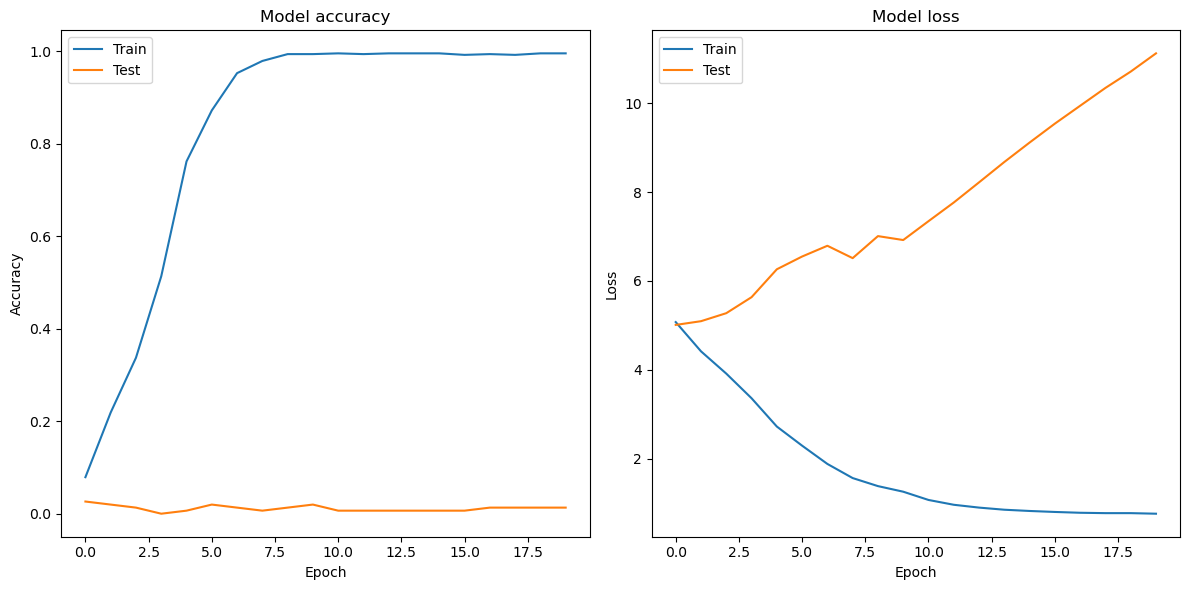

In [66]:
# Adding stratify has increased the accuracy of the model. The accuracy is not 0,99 and val accuracy is now 0,63 at 12 Epoch. 
# THis next iteration will make use of bath normalization to see if I can increase the accuracy even further
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #Stratify is used to get a more balanced training and test dataset

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:], kernel_regularizer=l2(0.01)), #adding l2 regulerization
    BatchNormalization(), # Adding batch normalization
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(), # Adding batch normalization
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(), # Adding batch normalization
    Dense(y_train.shape[1], activation='softmax', kernel_regularizer=l2(0.01)) #adding l2 regulerization
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test)) # Increaseing the batch size from default 32 to 64

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
  #(Open AI, 2024)
  #(Raiaan et al., 2024)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 0.0228 - loss: 5.6972 - val_accuracy: 0.0197 - val_loss: 5.0645
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.0525 - loss: 5.1656 - val_accuracy: 0.0197 - val_loss: 5.3586
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.0910 - loss: 4.8848 - val_accuracy: 0.0197 - val_loss: 8.5914
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.1242 - loss: 4.5678 - val_accuracy: 0.0132 - val_loss: 25.2080
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.1711 - loss: 4.2567 - val_accuracy: 0.0132 - val_loss: 41.3575
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.2135 - loss: 4.1382 - val_accuracy: 0.0132 - val_loss: 63.3516
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.3258 - loss: 3.7566 - val_accuracy: 0.0132 - val_loss: 77.8134
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.4035 - loss: 3.4308 - val_accuracy: 0.0132 - val_l

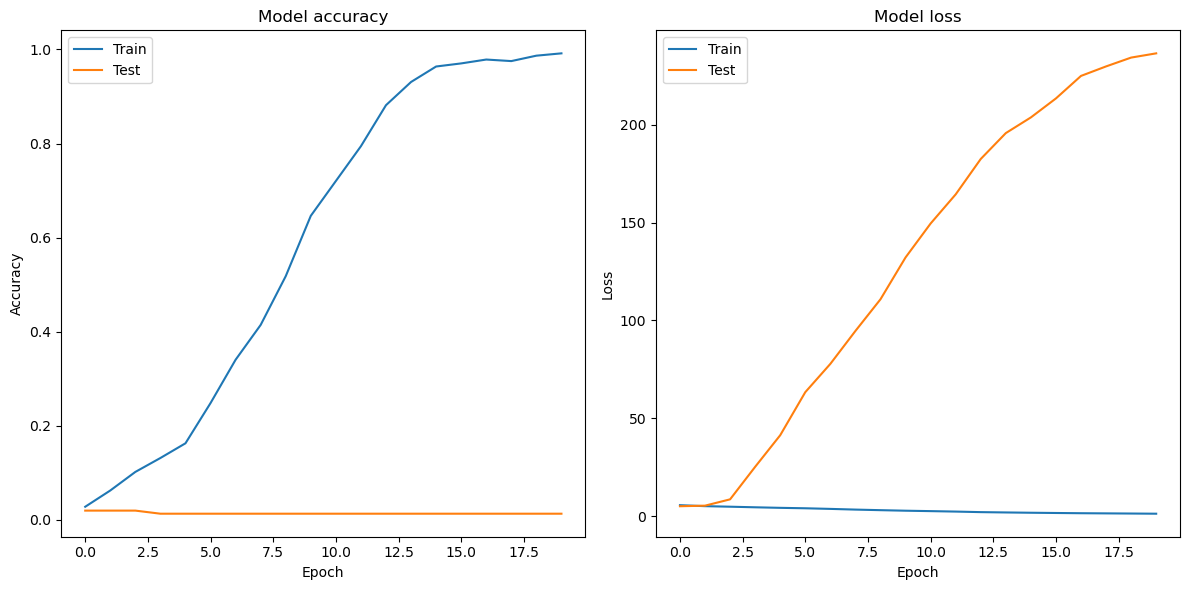

In [67]:
# This decreased the accuracy of the model.
# I will attempt to keep the model and add dropout feature, despite it too lowering the accuracy. I am hopeful that together they can increase the acuracy of the model
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #Stratify is used to get a more balanced training and test dataset

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:], kernel_regularizer=l2(0.01)), #adding l2 regulerization
    BatchNormalization(), # Adding batch normalization
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Adding dropout after the first max-pooling layer (0,25)
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(), # Adding batch normalization
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Adding dropout after the second max-pooling layer (0,25)
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(), # Adding batch normalization
    Dropout(0.5), # Adding dropout before the final output layer (0,5)
    Dense(y_train.shape[1], activation='softmax', kernel_regularizer=l2(0.01)) #adding l2 regulerization
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test)) # Increaseing the batch size from default 32 to 64

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
  #(Open AI, 2024)
  #(Raiaan et al., 2024)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.0096 - loss: 12.9963 - val_accuracy: 0.0132 - val_loss: 5.0169
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.0070 - loss: 4.9929 - val_accuracy: 0.0132 - val_loss: 4.9479
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.0153 - loss: 4.9302 - val_accuracy: 0.0132 - val_loss: 4.8880
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.0137 - loss: 4.8614 - val_accuracy: 0.0439 - val_loss: 4.7854
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.0381 - loss: 4.7015 - val_accuracy: 0.0526 - val_loss: 4.6648
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.0746 - loss: 4.4432 - val_accuracy: 0.1009 - val_loss: 4.4368
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.1514 - loss: 4.1230 - val_accuracy: 0.1009 - val_loss: 4.3921
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.2374 - loss: 3.8469 - val_accuracy: 0.1754 - val_loss: 4.0093
Epoch 9

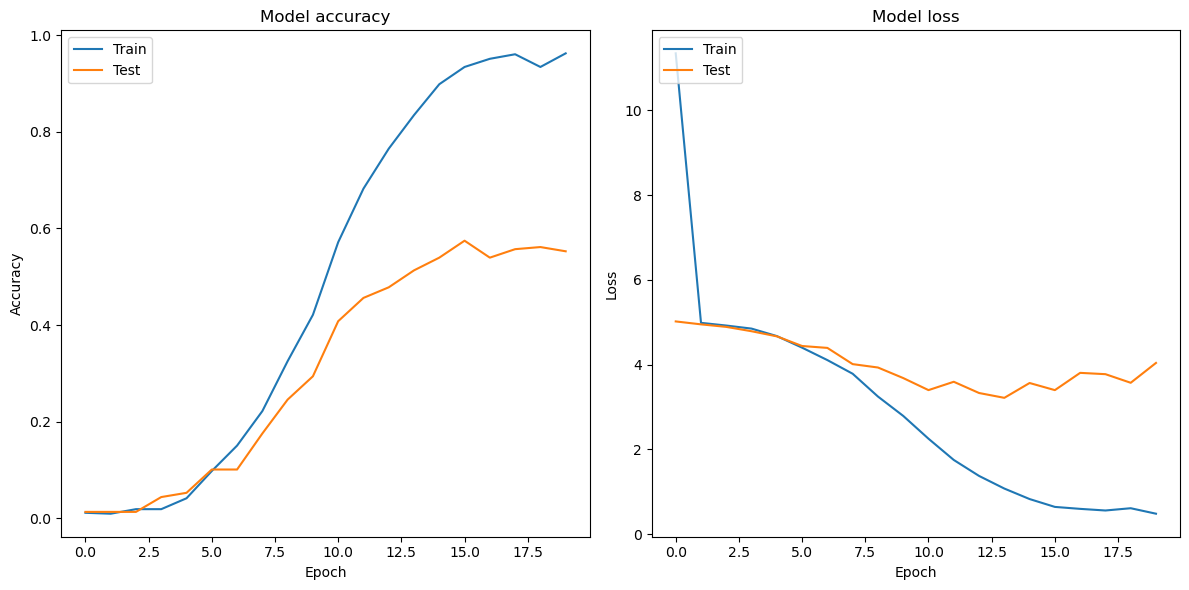

In [68]:
#the addition of batch normalization and drop out layers have decreased thea ccuracy .therefore I will return to the previous iteration and continue adjusting hyper parameters from there
#In this iteration I will change the testtrain split from 0,2 to 0,3. This is to see if a larger test set will increase the accuracy of the model
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) #Stratify is used to get a more balanced training and test dataset

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:], kernel_regularizer=l2(0.01)), #adding l2 regulerization
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax', kernel_regularizer=l2(0.01)) #adding l2 regulerization
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test)) # Increaseing the batch size from default 32 to 64

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
  #(Open AI, 2024)
  #(Raiaan et al., 2024)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.0163 - loss: 21.7035 - val_accuracy: 0.0197 - val_loss: 5.7165
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.0249 - loss: 5.6671 - val_accuracy: 0.0329 - val_loss: 5.5433
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.0299 - loss: 5.4685 - val_accuracy: 0.0724 - val_loss: 5.3084
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.1256 - loss: 5.0839 - val_accuracy: 0.1711 - val_loss: 4.9808
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.2942 - loss: 4.4354 - val_accuracy: 0.2763 - val_loss: 4.5479
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4354 - loss: 3.6451 - val_accuracy: 0.3816 - val_loss: 4.0386
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6266 - loss: 2.7856 - val_accuracy: 0.4737 - val_loss: 3.5702
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7884 - loss: 2.0532 - val_accuracy: 0.5461 - val_loss

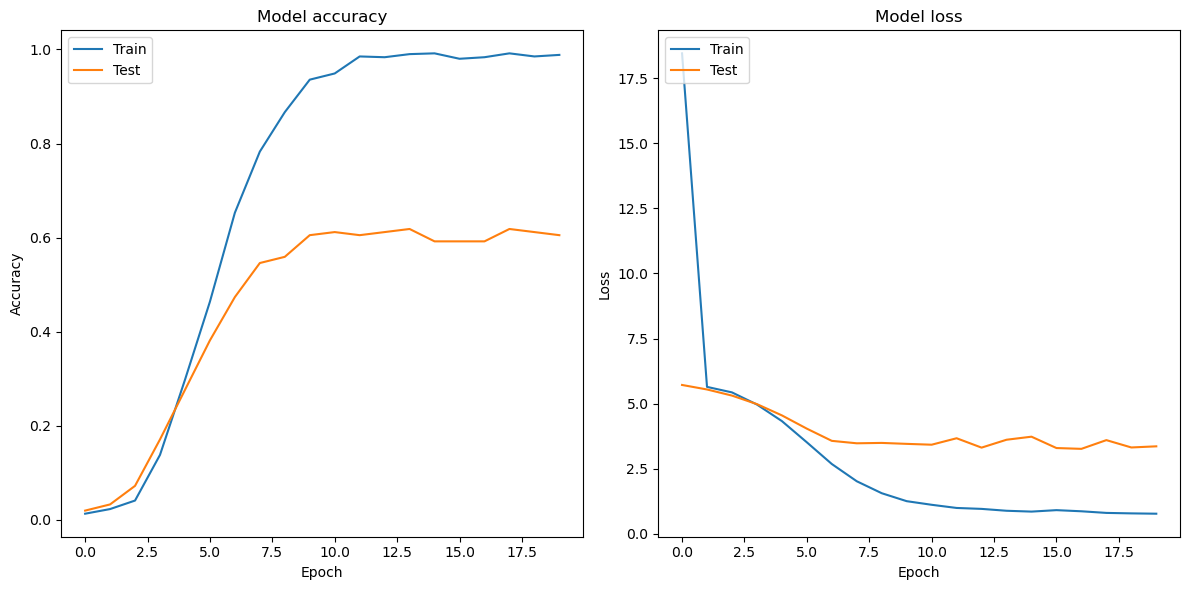

In [72]:
# the train/test adjustment has decreased the accuracy. therefore I will again be rerturning to a previous iteration
# In this iteration I will adjust the l2 regulerization from 0,01 to 0,02. This is to see if a smaller regulerization will increase the accuracy of the model
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #Stratify is used to get a more balanced training and test dataset

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:], kernel_regularizer=l2(0.02)), #adding l2 regulerization
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax', kernel_regularizer=l2(0.02)) #adding l2 regulerization
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test)) # Increaseing the batch size from default 32 to 64

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
  #(Open AI, 2024)
  #(Raiaan et al., 2024)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.0071 - loss: 12.0552 - val_accuracy: 0.0197 - val_loss: 5.0154
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.0309 - loss: 4.9961 - val_accuracy: 0.0395 - val_loss: 4.9362
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.0458 - loss: 4.8813 - val_accuracy: 0.0526 - val_loss: 4.8138
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.0776 - loss: 4.6557 - val_accuracy: 0.1118 - val_loss: 4.6366
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.1427 - loss: 4.3281 - val_accuracy: 0.1842 - val_loss: 4.2663
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.2819 - loss: 3.7368 - val_accuracy: 0.2895 - val_loss: 3.8844
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4262 - loss: 3.1140 - val_accuracy: 0.3618 - val_loss: 3.7787
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5488 - loss: 2.5235 - val_accuracy: 0.4211 - val_loss

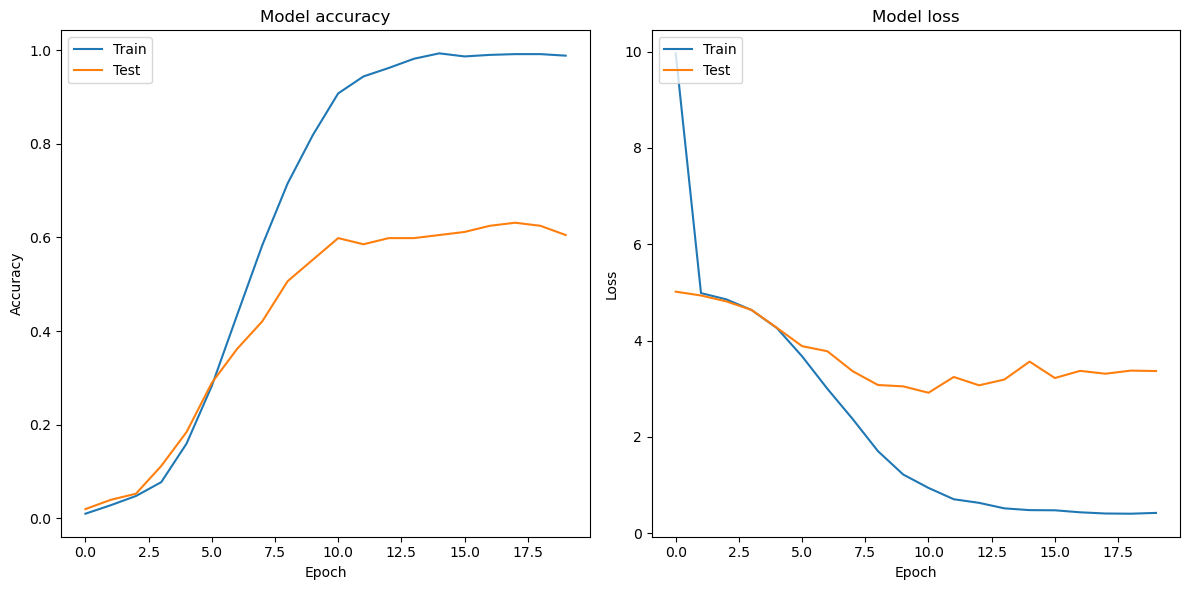

In [73]:
# the l2 adjustment has decreased the accuracy. therefore I will again be rerturning to a previous iteration
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #Stratify is used to get a more balanced training and test dataset

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:], kernel_regularizer=l2(0.01)), #adding l2 regulerization
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax', kernel_regularizer=l2(0.01)) #adding l2 regulerization
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test)) # Increaseing the batch size from default 32 to 64

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
  #(Open AI, 2024)
  #(Raiaan et al., 2024)

Epoch 1/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.0099 - loss: 21.2664 - val_accuracy: 0.0263 - val_loss: 5.0265
Epoch 2/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.0397 - loss: 4.9778 - val_accuracy: 0.0197 - val_loss: 4.9244
Epoch 3/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.0513 - loss: 4.8603 - val_accuracy: 0.0789 - val_loss: 4.7413
Epoch 4/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.1419 - loss: 4.4891 - val_accuracy: 0.2237 - val_loss: 4.4230
Epoch 5/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.2704 - loss: 3.9057 - val_accuracy: 0.2368 - val_loss: 4.2476
Epoch 6/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4675 - loss: 3.0302 - val_accuracy: 0.3816 - val_loss: 3.6432
Epoch 7/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6765 - loss: 2.0603 - val_accuracy: 0.5263 - val_loss: 3.1437
Epoch 8/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8081 - loss: 1.4844 - val_accuracy: 0.5263 - val_loss

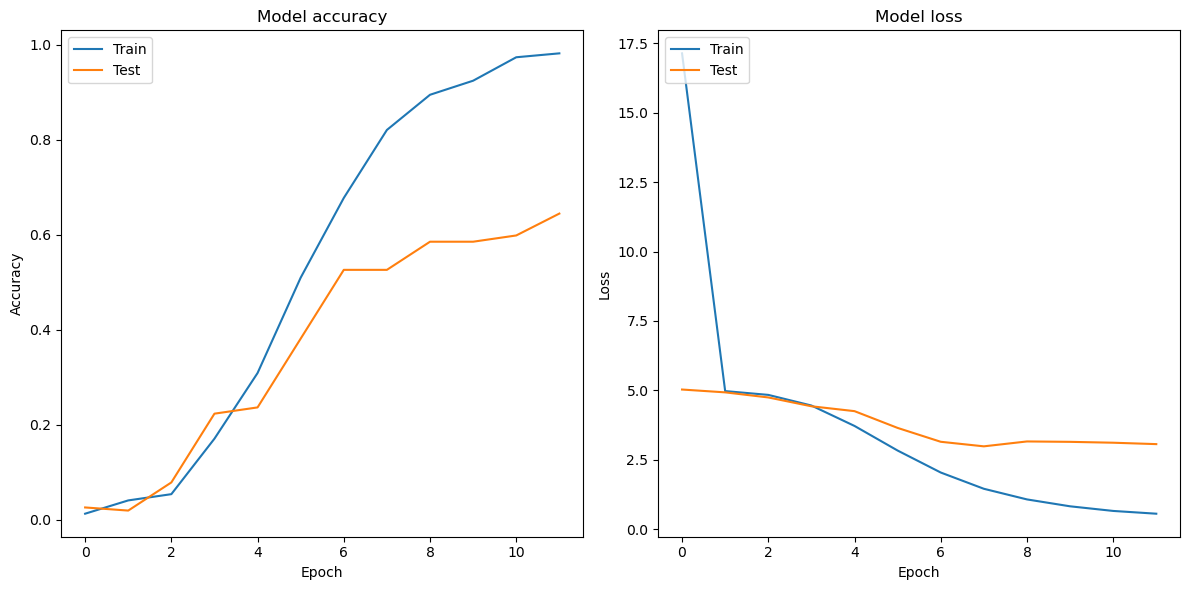

In [76]:
#The final Iteration of the CNN model has an accuracy of 0.9786 and validation accuracy of 0.6447. This is the most accurate model I was able to create.
#Adjusting the Epoch to optimise the accuracy results
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #Stratify is used to get a more balanced training and test dataset

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:], kernel_regularizer=l2(0.01)), #adding l2 regulerization
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax', kernel_regularizer=l2(0.01)) #adding l2 regulerization
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=12, batch_size=64, validation_data=(X_test, y_test)) # Increaseing the batch size from default 32 to 64

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
  #(Open AI, 2024)
  #(Raiaan et al., 2024)